# CSCI 1470 Lab 02: Crash Course on Machine Learning #
***important***: Before starting the lab please copy this notebook into your own google drive by clicking on "File" and "Save a copy in drive"

---

In this lab, we will be introducing the basic idea behind machine learning. This will introduce a good amount of theory, math notation, and practical implementation. The goal of this all this lab is to catch students up to where everybody is on a level playing field. Also, we wanted to help ease you into Programming Assignment 1 so you don't go in completely lost, so... **we hope you find this lab useful! :-)**

**Make sure to get all questions checked off by your TA to get credit for this lab!** 

**HINT:** Search "Check-" in browser search (cmd+f mac, ctrl+f windows)

# The Basic Supervised ML Formulation 

In many previous courses, you have had to implement various algorithms to find "solutions". For example: 
- You'd like to take a user's math equation and spit out a calculator's solution. 
- You'd like to take a graph specification and output the shortest path from one location to another. 
- You want a user to run your program and get the text "Hello World!" in the console.

There are many clever algorithms out there that are able to do a lot of things, both very specific and very general. However, there are some problems that may be a bit too hard to code up a good solution for. For example, **how do you identify whether an image is a cat or a dog?** Humans can definitely do it, since you've seen many examples of animals and probably have an internal understanding of what they look like. But how would a computer, which merely has access to a large space of pixels, do it? 

It turns out that machine learning is a great way of developing such algorithms, and can be applied when we have examples to train off of. The basic paradigm shift can be described as follows: 

 - **Normal Computation:** Inputs and Function -> Outputs
 - **Machine Learning:** Data -> Function Associating Data
   - **Supervised:** Inputs and Outputs -> Function

This course will really mostly focus on supervised machine learning formulations in the earlier parts, so we're just going to introduce this for now. In supervised machine learning, we have a lot of data with various properties. Some of the properties are easy to get, while others are not so simple. The idea is that we want to predict some of the harder properties in the data. 

---

# Mathematical Discussion

Let's say we have a dataset of entries. These entries have two kinds of properties; those which are readily available (let's call them $X$) and those that we'd like to predict (let's call them $Y$). 

### Assumptions:
- $\mathbb{X, Y} \subset \mathcal{D}(\mathbb{X}), \mathcal{\mathbb{D}}(Y)$
<details>This is trivially true, but it's worth mentioning. The observations $\mathbb{X}$ and $\mathbb{Y}$ are a subset of all possible inputs/outputs that span over some mathematical domain.
- **[NOT IN LECTURE]** $\mathbb{X, Y} \sim \mathcal{X, Y}$
<details>$X$ and $Y$ come from of some probability distributions $\mathcal{X,Y}$.
- **[NOT IN LECTURE]** $\mathcal{X}$ and $\mathcal{Y}$ are interdependent.
<details>$\mathcal{X}$ and $\mathcal{Y}$ depend on each other such that $\mathcal{Y}$ can be predicted by $\mathcal{X}$ with some amount of confidence. 
- There exists an $f : \mathcal{X} \to \mathcal{Y}$ such that $f(\mathbb{X}) = \mathbb{E}[\mathbb{Y|X}]$.
<details>There exists some function $f$ that can explain or predict $y$ for a given $x$ with some confidence. $\mathbb{E}$ is the expectation, or the long-run mean.

- $\mathbb{Y} = f(\mathbb{X}) + \xi$ with some amount of noise $\xi$

### Machine Learning Solution:

- We would like get $f$, but we only have $\mathbb{X}$ and $\mathbb{Y}$...
- So let's create a tunable model $h_\theta$ that approximates $f$ by tweaking $\theta$. 
- Choose $h$ that minimizes loss evaluations $\mathcal{L}(h, \mathbb{X}_{train}, \mathbb{Y}_{train})$.
<details>
$\mathcal{L}$ is a metric of how well the model performs. It may depend on how similar $h(\mathbb{X})$ and $\mathbb{Y}$ (distance metric). It may also depend on how complex $h$ is to make sure it transfers well to unseen data points (regularization). There's a lot of options here.  
</details>
- Verify that $h$ generalizes to $\mathcal{X,Y}$ by minimizing $\mathcal{L}(h, \mathbb{X}_{test}, \mathbb{Y}_{test})$.
<details>
We want our function to transfer well to unseen data points, so we only train on a subset of the data. Once we minimize loss on this subset, we test to see if the model performs well on the other data and, by extension, $\mathcal{XY}$ as a whole.
</details>

We may also choose to incorporate a validation dataset. The formal role distribution is: 
- Use $\mathbb{X}_{train}, \mathbb{Y}_{train}$ to directly inform $\theta$.
- Use $\mathbb{X}_{valid}, \mathbb{Y}_{valid}$ to suggest generalizability (and indirectly inform architecture of $h$).
- Use $\mathbb{X}_{test}, \mathbb{Y}_{test}$ to suggest generalizability (and verify that validation dataset didn't screw up model selection).



### Practical Considerations

**Activation Functions**

In practice (and for our models of interest), we will want to constrain our predictor outputs to have various properties. We will use these frequently and refer to them as **activation functions**. 

Some common ones include: 

  - [**Sigmoid**](https://en.wikipedia.org/wiki/Sigmoid_function): $\mathbb{R}^n \to (0,1)^n$. Constrains the real numbers down to the range of 0 to 1. 
    - Useful for predicting probablities for classification (mentioned during discussion of binary classification cross entropy loss).
  - [**Softmax**](https://en.wikipedia.org/wiki/Softmax_function): $\mathbb{R}^n \to p = [0, 1]^n$ such that $\sum p = 1$ (AKA discrete probability distribution). 
    - Simply divides each real-number entry by the sum of all entires.
    - Useful for predicting probabilities of classes where only one class is correct.
  - [**Rectifier (ReLU)**](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)): $\mathbb{R}^n \to \mathbb{R}^n_{\geq 0}$. Is the output less than zero? Then just make it zero. 
    - Very useful when the output of a model *goes into another model as input*. **LeakyReLU is even better**
  - [**Normalization**](https://en.wikipedia.org/wiki/Normalization_(statistics)): $\mathbb{R}^n \to \mathbb{R}^n$, but more evened out and centered.
    - Can also be used in pre-processing the inputs/outputs and in conjuction with other activations. 
    - The model code for this lab should realistically normalize the data, but we've already put enough into it. 

**Loss Functions**

We said we needed to define a metric of goodness for learning. These are encompassed by [measure theory](https://en.wikipedia.org/wiki/Measure_(mathematics)) and have various useful properties. We essentially want to exploit a property that **decreasing the measure evaluation increases the goodness** to at least some extent. 

**OF NOTE**: This loss, which we call a "metric of goodness," does not have to be human-interpretable. It just has to progressively lead to a good configuration. A human-interpetable "metric of goodness" would be an **"accuracy metric"**.

Some common metrics that can be incorporated into loss functions include: 

  - [**$L^p$ Norm**](https://en.wikipedia.org/wiki/Norm_(mathematics)): A function modeling the positional distance between points in space.
    - $L^2$ norm is euclidean distance, which is usually good enough. <details><summary><b>Mathematical Details</b></summary>
Suppose we have two vectors $\vec U$ and $\vec V$. Their difference, which we will usually think of as *error* in our contexts, is $\vec E = \vec U - \vec V$. The norm of their difference is $||\vec E||$, which specifies how far away the error point is from the origin, and thereby the magnitude of error. $||\vec U - \vec V||_p = \big(\sum_i (\vec U_i - \vec V_i)^p \big)^{1/p}$, so you can see how this fits to euclidean distance $||\vec E||_2 = \sqrt{\sum_i (\vec U_i - \vec V_i)^2}$. Still, it will sometime be useful to go to the other entries of $L^p$ ($L^1$ is also common).
</details>
    - It's square, **Mean Squared Error** $f(x) = ||x||_2^2$ also works really well in practice.
    - We can also use the norm to add **regularization** into our loss function, which discourages the creation of overfit models. 
      - For example, we can add $||\theta||_2$ to the model loss (i.e. [ridge regression or LASSO](https://en.wikipedia.org/wiki/Regularization_\(mathematics\))), which would suggest that we want to both decrease the error of our model and also to lower the magnitude of the trainable parameters of the model. 

  - [**Cross Entropy**](https://en.wikipedia.org/wiki/Cross_entropy): A function modeling the entropy it would take to transform one probability distribution to another. 
    - Specifies how different two probability distributions are; Great for probability-domain outputs. 
<details><summary><b>Categorical Cross-Entropy Details</b></summary>    
When the output is a discrete probability distribution (i.e. thanks to softmax), you can use <b>categorical cross-entropy</b> $CE(u, v) = -\sum_{i}{u_i \log(v_i)}$. 
</details>
<details><summary><b>Binary Cross-Entropy Details</b></summary>    
When the features per element don't sum up to 1 (but every feature is in $[0, 1]$), you can then use <b>binary cross-entropy</b> $BCE(u, v) = -\sum_i y_i \log(v_i) + u_i^c\log(v_i^c)$. Note that $x^c = 1-x$ is the (probabilistic) complement of event $x$.
</details>


  - There are a lot of other ones and some that are just as common as those mentioned... but you don't want to know about them yet. 

**[IMPORTANT]** Decreasing the loss by moving towards a direction *hopefully* gets you closer to the minimum point of loss. **HOWEVER**, this doesn't necessarily happen for real-world situations. 

Most real problems are considered **non-convex**, which consequently means that decreasing the loss evaluation at a specific point does not necessarily mean that you're getting closer to the overall (global) minimum of the system. Machine learning solutions tries to get around this with various techniques which you will get to implement later. 


**Model Architecture**
- In theory, the only constraint on $h$ is that it is a function $h : \mathcal{D}(\mathbb{X}) \to \mathcal{D}(\mathbb{Y})$ (maps from the domain of $\mathbb{X}$ to the domain of $\mathbb{Y}$). However, searching this space is inpractical, so we will usually pick a specific class of functions $h_\theta$ with tunable components $\theta$ (in CS terms, the **model architecture**). 
  - For example, the polynomial function $h_\theta(x_1, x_2) = \theta_1x_1^2 + \theta_2x_2^2$ is a tunable $\mathbb{R}^2 \to \mathbb{R}$ function which could be used in practice. 
  - For this lab, we will mostly be focusing on the **perceptron model**, which predicts the output element indexed by $d$ (for *destination*) from the input elements indexed by $s$ (for *source*) as $h_{\theta}(x)^{(d)} = a\big(\sum_s \theta_{s,d}x^{(s)}\big)$ with some activation function $a$.
</details>
<details><summary><b>Where's The Bias?</b></summary>   
We will assume for mathematical clarity that any entry $x$ of $\mathbb{X}$ can be represented of as follows to allow the first weight to function as a bias. Do not do this in your code though: $$x = \begin{bmatrix}1 \\ x_0 \\ x_1 \\ \vdots\end{bmatrix}\ \text{ implies that }\ \theta_{0, d}x^{(0)} = \theta_{0, d}$$
</details>


### Important Notes:


- In the above discussions, $x$ is an element of the set $\mathbb{X}$ which is a set of realizations of the distribution $\mathcal{X}$ (and the same goes for $y$ etc.). However, we will begin referring to $\mathbb{X}$ and $\mathbb{Y}$ as vectors when it becomes useful (this is how they are stored in memory anyways).

- $h(x) = \hat{y}$ is a common and convenient notation. These symbols can be called the 'prediction' or the 'hypothesis'.

- $\mathbb{Y}$ can be referred to as the "ground truth"... even though it could have plenty of elements that are misrepresentative or low-quality...


### Diagram Overview
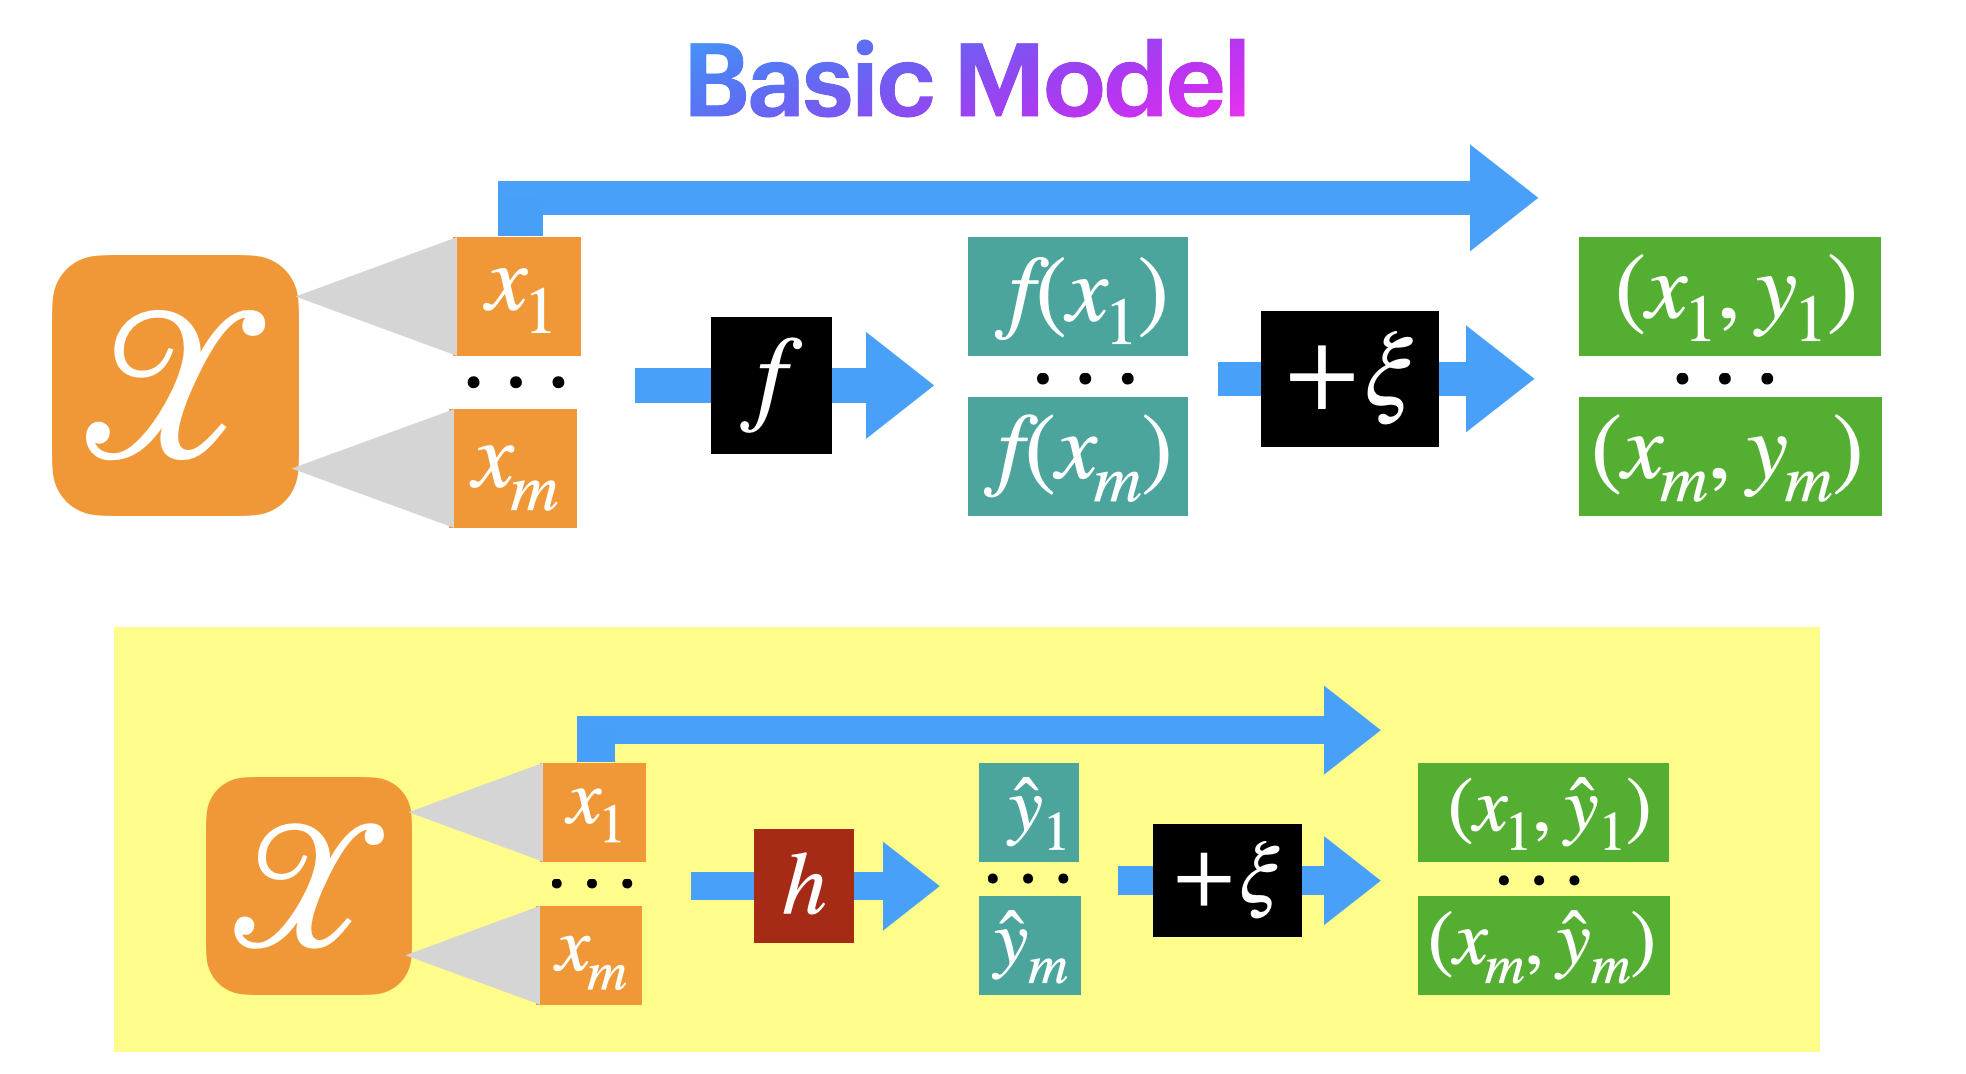

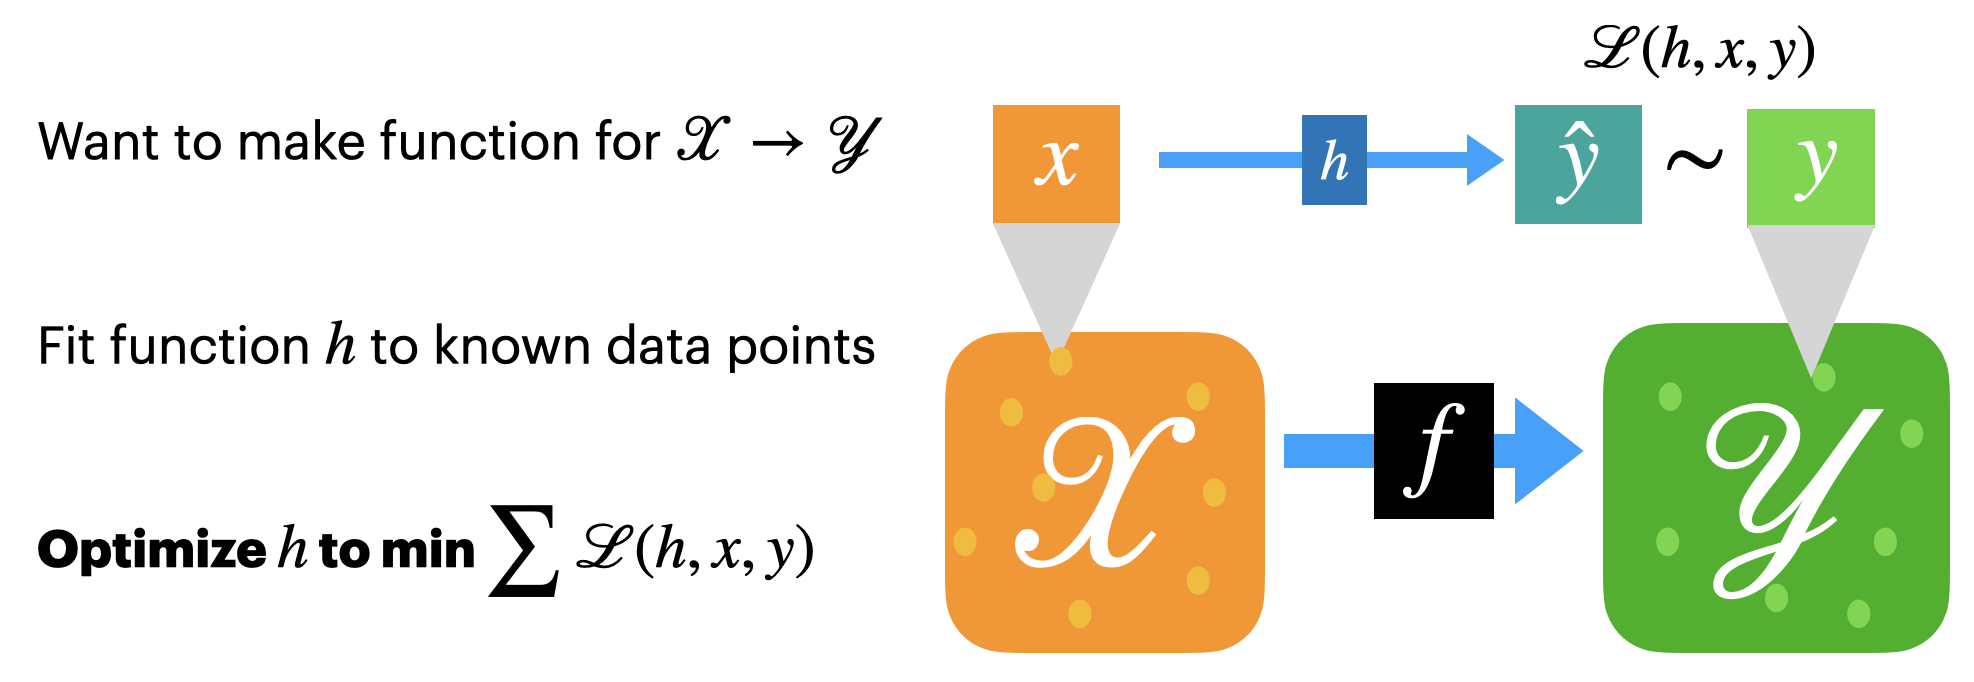

## Concrete Examples:

- **Predict position of a ball after $t$ seconds.**
  - $h : \mathbb{R} \to \mathbb{R}$. Input might be lower-bounded.
  <details><summary><b>Basic Regression</b></summary> $\mathbb{R}$ is all of the real numbers, which include positive and negative decimals and irrational numbers (i.e. $\pi, e, \sqrt{2}$). This is a natural regressional (numerical) formulation: The output is a numerical value that represents some continuous distribution.
  - Maybe minimize Euclidean Distance $\mathcal{L}(h, x, y) = ||h(x) - y||_2$. 

- **Predict the job type (out of 8 possible jobs) of employees based on the pay, number of years worked, and years in school** 
  - $h : \mathbb{R}^3 \to [0,1]^8$
  <details><summary><b>One-Hot Encoding Representation</b></summary> A set raised to a power $n$ is set of $n$-element combinatins of the set. For example, $\{0,1\}^2 = (00, 01, 10, 11)$ where each pair of numbers is technically a set. The problem with 8 arbitrary job types is that there is not a natural progressive relationship among them. Let's say that for a particular example, your model predicts job 3 (mechanic), and the right answer is job 7 (programmer). Does increasing your prediction to job 3.5 or job 4 (a secretary) make your prediction any better? No. However, let's say that you're now associating each class as a probability and are predicting $00(.9)000(.1)0$. We can then try to transition this into a correct prediction pretty easily without any cross-category conflicts. 
  - $h$ probably contains softmax to conform to discrete probability distribution.
  - Consider using $\mathcal{L}(h, x, y) = \text{CE}(h(x), y)$.

- **Predict whether an image contains a cat or a dog.** 
  - $h : \{0,\cdots,255\}^{H \times W \times 3} \to [0, 1]$
  <details> <summary><b>BIG Input Space</b></summary>. Note how the image space is very big. For a 100x100 image with 3 channels (and 255 intensity options per channel), that's ~30 million possible inputs. 
  <!-- - $h : \{0,\cdots,255\}^{H \times W \times 3} \to \sigma(\mathbb{R}^2) = [0, 1]$ for softmax function $\sigma$ -->

<!-- - Colorize a greyscale photo based on a reference pic.  -->
  <!-- - $h : \{0,\cdots,255\}^{H \times W \times (3+1)} \to \{0,\cdots,255\}^{H \times W \times 3}$ -->

- **Pick a move for a robot that can make one of 10 motions**. 
  - $h : \text{State Abstraction Space} \to [0,1]^{10}$
  <details> <summary><b>What's The Input Space?</b></summary> Some problems make it really hard to define an input space. What level of abstraction would you even use? For chess, do you want to use a grid representation? Maybe a graph representation? How about the image representation when viewed from a particular camera? 
<!-- - Generate the next word in a sentence after $n$ words.  -->
  <!-- - $h : D^n \to D$ for a dictionary $D$ with a lot of english words.  -->

We can talk about what we want all day long, but it doesn't help if we can't make the function. Let's go ahead and try to make one.

---

# Modeling A Basic Relationship

Let's try to make a basic model. Let's say we want a model that approximates the relationship of the following multivariate function: 

> $f: \mathbb{R}^2 \to \mathbb{R}$ such that $f(x) = 0.8x_0 + 0.2x_1 + 20$

On one hand, we know what this is, so we really don't need to approximate a function, right? But in many real cases we have no idea what this real function looks like, so let's use this as a simple example. 

Let's go ahead and write the function for ourselves. 


In [1]:
import numpy as np

coef = np.array([.8, .2])
bias = np.array([20])

def true_f(X, coef, bias): 
    '''TODO: Implement this using vectorized operations'''
    y1 = coef * X 
    y2 = np.sum(y1, axis = 1) # get every row sum in an array 
    y3 = y2 + bias
    y4 = y3.reshape((len(X),1))
    # y4 = y3.T    transpose doesn't work here
    return y4

inputs = np.array([[0,0], [0,10], [10,0], [20,20], [-10,-10]])
outputs = true_f(inputs, coef, bias)
print(outputs)
assert outputs.shape == (inputs.shape[0], 1)

[[20.]
 [22.]
 [28.]
 [40.]
 [10.]]


In [2]:
coef = np.array([.8, .2])
coef

array([0.8, 0.2])

In [3]:
import numpy as np
coef = np.array([.8, .2])
coef
bias = np.array([20])
bias

array([20])

**Expected [CHECK-OFF]:**
```
[[20.]
 [22.]
 [28.]
 [40.]
 [10.]]
 ```

We can train up a model (or hypothesis function) $h$ to approximate $f$ just by using examples of data. We can do this by taking in realizations of data points and training the model to conform to them. Specifically, we're trying to get a set of known data points $\mathbb{X} \sim \mathcal{X}$ with known (or good enough) output values $\mathbb{Y} \sim \mathcal{Y}$. 


Let's generate some data points:

In [4]:
seed = 42   ## SET RNG SEED TO 42 WHEN PRESENTING!!!
np.random.seed(seed)

## Generate 100 entries of X_0 and X_1 between 0 and 500 
X = np.concatenate([
    np.random.choice(500, 100).reshape([-1, 1]),
    np.random.choice(500, 100).reshape([-1, 1])
], axis=1).astype(np.float32)

Y = true_f(X, coef, bias).astype(np.float32)

## zip(X, Y) returns ((X[0], Y[0]), (X[1], Y[1]), ...)
## enumerate(Z) returns a ((0, Z[0]), (1, Z[1]), ...)
for i, (x, y) in enumerate(zip(X, Y)):  # x is an element of X and y is an element of Y 
    if i > 5: break
    print(f'sum({x} * {coef}) + {bias} = {y}')

sum([102. 445.] * [0.8 0.2]) + [20] = [190.6]
sum([435. 483.] * [0.8 0.2]) + [20] = [464.6]
sum([348. 269.] * [0.8 0.2]) + [20] = [352.2]
sum([270. 350.] * [0.8 0.2]) + [20] = [306.]
sum([106. 303.] * [0.8 0.2]) + [20] = [165.4]
sum([ 71. 270.] * [0.8 0.2]) + [20] = [130.8]


In [5]:
seed = 42   ## SET RNG SEED TO 42 WHEN PRESENTING!!!
np.random.seed(seed)

## Generate 100 entries of X_0 and X_1 between 0 and 500 
X = np.concatenate([
    np.random.choice(500, 100).reshape([-1, 1]),
    np.random.choice(500, 100).reshape([-1, 1])
], axis=1).astype(np.float32)

Y = true_f(X, coef, bias).astype(np.float32)

In [6]:
seed = 42   ## SET RNG SEED TO 42 WHEN PRESENTING!!!
np.random.seed(seed)

X = np.concatenate([
    np.random.choice(500, 100).reshape([-1, 1]),
    np.random.choice(500, 100).reshape([-1, 1])
], axis=-1)
X

array([[102, 445],
       [435, 483],
       [348, 269],
       [270, 350],
       [106, 303],
       [ 71, 270],
       [188, 455],
       [ 20, 461],
       [102, 214],
       [121, 251],
       [466, 189],
       [214, 295],
       [330, 212],
       [458, 207],
       [ 87, 236],
       [372, 337],
       [ 99, 366],
       [359,  52],
       [151, 279],
       [130, 409],
       [149, 216],
       [308, 251],
       [257, 187],
       [343, 379],
       [491, 492],
       [413,  40],
       [293, 156],
       [385,  14],
       [191, 300],
       [443,  64],
       [276, 344],
       [160, 326],
       [459,   8],
       [313, 343],
       [ 21, 128],
       [252, 491],
       [235, 135],
       [344, 471],
       [ 48,  62],
       [474, 138],
       [ 58, 498],
       [169,  80],
       [475, 391],
       [187, 162],
       [463, 418],
       [270, 288],
       [189, 378],
       [445, 260],
       [174, 489],
       [445, 230],
       [ 50,  40],
       [363,  27],
       [ 54,

It is worth mentioning that in the real world, there is usually no true function $f: \mathcal{X} \to \mathcal{Y}$ such that $f(\mathbb{X}) = \mathbb{Y}$ for all observations. The reason is because $\mathbb{Y}$ may not be entirely explained by $\mathbb{X}$. A more realistic formulation is $\mathbb{Y} = f(\mathbb{X}) + \xi$ where $\xi$ is noise unexplainable by $\mathbb{X}$ (more specifically, $\xi = \mathbb{Y} - \mathbb{E}[\mathbb{Y|X}]$). 

Machine learning models try to be resiliant to this, and so we can noise up our data just for fun.

In [7]:
np.random.seed(seed)

def noise_f(size):
    return np.random.standard_normal(size=size)

Y_base  = Y.copy()
Y_noise = noise_f(size=Y_base.shape)

for i, (y, n) in enumerate(zip(Y_base, Y_noise)):
    if i > 5: break
    print(f'{y} + {n} = {y + n}')

Y = Y_base + Y_noise

[190.6] + [0.49671415] = [191.09672026]
[464.6] + [-0.1382643] = [464.4617418]
[352.2] + [0.64768854] = [352.84770075]
[306.] + [1.52302986] = [307.52302986]
[165.4] + [-0.23415337] = [165.16584052]
[130.8] + [-0.23413696] = [130.56586609]


In [8]:
np.random.seed(seed)

def noise_f(size):
    return np.random.standard_normal(size=size)

Y_base  = Y.copy()
Y_noise = noise_f(size=Y_base.shape)
Y_noise

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       [ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282],
       [ 0.76743473],
       [-0.46947439],
       [ 0.54256004],
       [-0.46341769],
       [-0.46572975],
       [ 0.24196227],
       [-1.91328024],
       [-1.72491783],
       [-0.56228753],
       [-1.01283112],
       [ 0.31424733],
       [-0.90802408],
       [-1.4123037 ],
       [ 1.46564877],
       [-0.2257763 ],
       [ 0.0675282 ],
       [-1.42474819],
       [-0.54438272],
       [ 0.11092259],
       [-1.15099358],
       [ 0.37569802],
       [-0.60063869],
       [-0.29169375],
       [-0.60170661],
       [ 1.85227818],
       [-0.01349722],
       [-1.05771093],
       [ 0.82254491],
       [-1.22084365],
       [ 0.2088636 ],
       [-1.95967012],
       [-1.32818605],
       [ 0.19686124],
       [ 0.73846658],
       [ 0.17136828],
       [-0.11564828],
       [-0.3011037 ],
       [-1.47852199],
       [-0

So now we have a nice sample of data. Let's see if we can't approximate a function to match it. 

## Evaluating A Candidate Function

A very simple and valid function approximator (or hypothesis function) is $h : \mathbb{R}^2 \to \mathbb{R}$:

In [9]:
## np.zeros_like returns a vertor of zeros in the shape of the input.
## I wonder why x[:, [0]] gives the desired vector shape and not x[:, 0] ...
zero_model = lambda x: np.zeros_like(x[:, [0]]) 

for i, (x, y, h) in enumerate(zip(X, Y, zero_model(X))):
    if i > 5: break
    print(f'h({x}) = {h}; expected something around {y}')


h([102 445]) = [0]; expected something around [191.09672026]
h([435 483]) = [0]; expected something around [464.4617418]
h([348 269]) = [0]; expected something around [352.84770075]
h([270 350]) = [0]; expected something around [307.52302986]
h([106 303]) = [0]; expected something around [165.16584052]
h([ 71 270]) = [0]; expected something around [130.56586609]


Now, you may be saying "hey, that's obviously a terrible model," but why? Sure, it's throwing away all the information, but does that mean it's necessarily bad?

---

**QUESTION:** Is there ever an instance where throwing away all the inputs will lead to a good function approximator in real life?

**ANSWER:** Consider the classic case of detecting whether a patient has a rare disease. Let's say that 1/1000 people have a disease and you'd like to use a model to see if their lab results indicate the presence of the disease. It is likely that the best-performing model will always say that you do not have the disease, as this will be 99.9% accurate on average. 

---

Anyways, to test how bad our model performs, we can just compare the prediction against the expected results. We'll need to select a measure to do this, which we will refer to as the **loss function** (or, sometimes, an *error function*). We'll just use euclidean distance for this. 

Let's begin building up an evaluation arsonal for our model in the form of a model wrapper. To start out, it's just going to evaluate how bad the model performs. 

In [10]:
def print_out(a, b, v): 
    ## Might be a useful utility
    print(a.shape, b.shape, v.shape)
    print(np.concatenate([a, b, v.reshape((-1, 1))], axis=-1))
    return v

class ModelWrapper_v1:

    ## Wow, a single instance variable declared local to all class instances
    ## You can now update Model_v1._loss_dict for all instances if you wanted
    _loss_dict = {
        # 'L2' : lambda a, b: print_out(a, b, np.linalg.norm(a - b, 2, axis=-1))
        'L2'  : lambda a, b: np.linalg.norm(a - b, 2, axis=-1), # the output here is a vector
        'MSE' : lambda a, b: np.mean((a - b)**2, axis=-1)  # the output here is a vector 
    }

    def __init__(self, model):
        self.model = model
    
    def _get_loss_fn(self, loss_key): ## <-- NOT IMPORTANT!!
        '''If loss_key is a function, return it. 
            Otherwise, retrieve the loss function by keyword (i.e. 'L2', 'MSE')
        '''
        if isinstance(loss_key, str):   return self._loss_dict[loss_key]
        elif callable(loss_key):        return loss_key
        else: raise ValueError('Loss function/key must be specified')

    def evaluate(self, x, y, loss='MSE'):
        '''TODO: I wonder what this does...?'''
        h = self.model(x) # h returns our prediction; we need to input x because the model we defined here: zero_model need x to specify the dimension
        loss_fn = self._get_loss_fn(loss)
        return np.mean(loss_fn(h, y)) # compute the loss using the prediction as well as the actual values
                                      # h is our prediction, y is the actual output 

model1 = ModelWrapper_v1(zero_model)
print('Loss evaluation of 0-predicting model')
print(' - L2-Norm (Euclidean Distance) :', model1.evaluate(X, Y, loss='L2'))
print(' - Mean Squared Error           :', model1.evaluate(X, Y, loss='MSE'))
# zero_model(X)

Loss evaluation of 0-predicting model
 - L2-Norm (Euclidean Distance) : 273.53815368097014
 - Mean Squared Error           : 88373.185609849


As you can see, the model isn't very good yet. Let's try to fix that. Our model that we presented was a constant model that always predicts zeros. Let us instead shift our focus to the simplest possible tunable model: 

> $h_\theta(x) = \theta$

There it is. Unfortunately, it's not very interesting. On one hand, it is trivial to optimize; just let $\theta = \mu(\mathbb{Y})$ and the loss will be minimized per the capacity of the model. But also, it isn't very good for modeling most realistic functions. 

Alternatively, we can also propose the most high-performing model possible: 

> $h_\theta(x) = y$ for all $x, y$ pairings of the known $\mathbb{X, Y}$ sets. 

This illustrates a short-coming in our evaluation logic. Per our method, this will make the loss always zero despite ignoring the space of unseen entries. We've failed to evaluate how well our model can perform on the problem space as a whole. 

To account for this, we can specify a holdout set that the model cannot leverage during training. After training on the **training** set, we can evaluate both the **training** and the held-out **testing** set to see how the model performs on both. If the model is able to perform well on both sets, than we can make the argument that the model was able to learn something useful and generalizable. 

Below is an example of a very basic $h_\theta(x) = y$ example; a K-Nearest-Neighbors formulation with $K=1$ such that the model will look for the closest observed point to form its prediction for any given input.



In [11]:
class ModelWrapper_v2(ModelWrapper_v1):

    # def __init__(self, model):         ## Already Implemented in v1
    # def _get_loss_fn(self, loss_key):  ## Already Implemented in v1
    # def evaluate(self, x, y):          ## Already Implemented in v1
    
    def train(self, x, y):
        h = self.model(x)
        losses = self.loss_fn(h, y)
        self.model.optimize(x, y, h)
        return np.mean(losses)

    def compile(self, loss='MSE'):
        self.loss_fn = self._get_loss_fn(loss)

    def predict(self, x):
        return self.model(x)

## -----------------------------------------------------------------------------

class OneNearestNeighbor:
    '''THIS IS NOT IMPORTANT FOR THIS LAB! You can just trust that it works.'''
    def __init__(self):
        self.pool = []      ## Stores set of observed data points
        self.seen = set()   ## Easy cache to tell us if model was trained on something. 

    def __call__(self, X):
        pred = np.zeros_like(X[:, [0]])
        if len(self.pool):  ## If the value pool has entries
            for i, x in enumerate(X): ## For every entry x in the input vector X
                ## Get x's distance from every entry in the pool
                dist_fn = lambda b: np.linalg.norm(x-b, 2, axis=-1) # dist_fn takes a parameter b and is defined as: np.linalg.norm(x-b, 2, axis=-1)
                dists   = [dist_fn(b[0]) for b in self.pool] # b is (x, y); b[0] is x
                ## Find the index of the pool entry that has min distance from x
                min_idx = np.argmin(dists) # find the minimum distance 
                ## Set that pool entry as the prediction for h(x)
                pred[i] = self.pool[min_idx][1]
        return pred
    
    def optimize(self, X, Y, H):
        for x, y in zip(X, Y):
            ## For every x/y pair in observation set, add them to observed pool
            ## Python sets/dicts require immutable inputs for keys, hence tuple. 
            if tuple(x) not in self.seen: 
                self.seen.add(tuple(x))
                self.pool += [(x, y)]

## -----------------------------------------------------------------------------

def train_model(Xs, Ys, ds_name):
    '''Trains a default model on the Xs and Ys dataset'''
    print(f"Training on {ds_name} Dataset")
    model = ModelWrapper_v2(OneNearestNeighbor())
    model.compile(loss='MSE')
    model.train(Xs, Ys)     ## Note: Just one training step rn. No epochs yet.
    return model

model = train_model(X*0, Y*0, '[0,0] -> [0]')
print(' - Evaluate on Training Set :', model.evaluate(X, Y, loss='MSE'))

model = train_model(X, Y, 'Entire')
print(' - Evaluate on Training Set :', model.evaluate(X, Y, loss='MSE'))

################################################################################
## FOR FUTURE REFERENCE, NOT IMPORTANT FOR LAB
### Fun Trick For Shuffling; Combine, choose, re-segment
train_pct = 0.6
train_size = int(train_pct * len(X))
XY = np.concatenate([X, Y], axis=1)
np.random.seed(seed)
np.random.shuffle(XY)       ## Example of an in-place algorithm
XY0 = XY[:train_size]   # start from start and end to 60% of the data 
XY1 = XY[train_size:]  # start from 60% of the data and to the end 
X0, Y0 = XY0[:, :2], XY0[:, 2:]  # get all the rows, for X0, get first two columns; for Y0, start from the second columns to the last column
X1, Y1 = XY1[:, :2], XY1[:, 2:]
################################################################################

model = train_model(X0, Y0, 'Only The Training')
print(' - Evaluate on Training Set :', model.evaluate(X0, Y0, loss='MSE'))
print(' - Evaluate on Testing Set  :', model.evaluate(X1, Y1, loss='MSE'))

Training on [0,0] -> [0] Dataset
 - Evaluate on Training Set : 88373.185609849
Training on Entire Dataset
 - Evaluate on Training Set : 0.34923776968077297
Training on Only The Training Dataset
 - Evaluate on Training Set : 0.0
 - Evaluate on Testing Set  : 703.0488102395235


In [12]:
def dist_fn(b): 
  return np.linalg.norm(x-b, 2, axis=-1)

Actually, this model isn't too bad in this case, but it's not very powerful and shouldn't be expected to transfer well to unseen data points. 

From here-on, we will start implementing a very basic example of a perceptron, which is the network that roughly simulates neuron interactions. This will be the main building block of a lot of the stuff we will cover in the course. 

# Basic Perceptron

So we've built up a basic model training and evaluation scheme that can work for a generic model. The above example shows how we can evaluate and train a 1-Nearest Neighbor model with unbounded cache and a specific distance assumption. Now, we will go ahead and make a basic single-layer perceptron (with just a linear function) using the same sort of structure. 

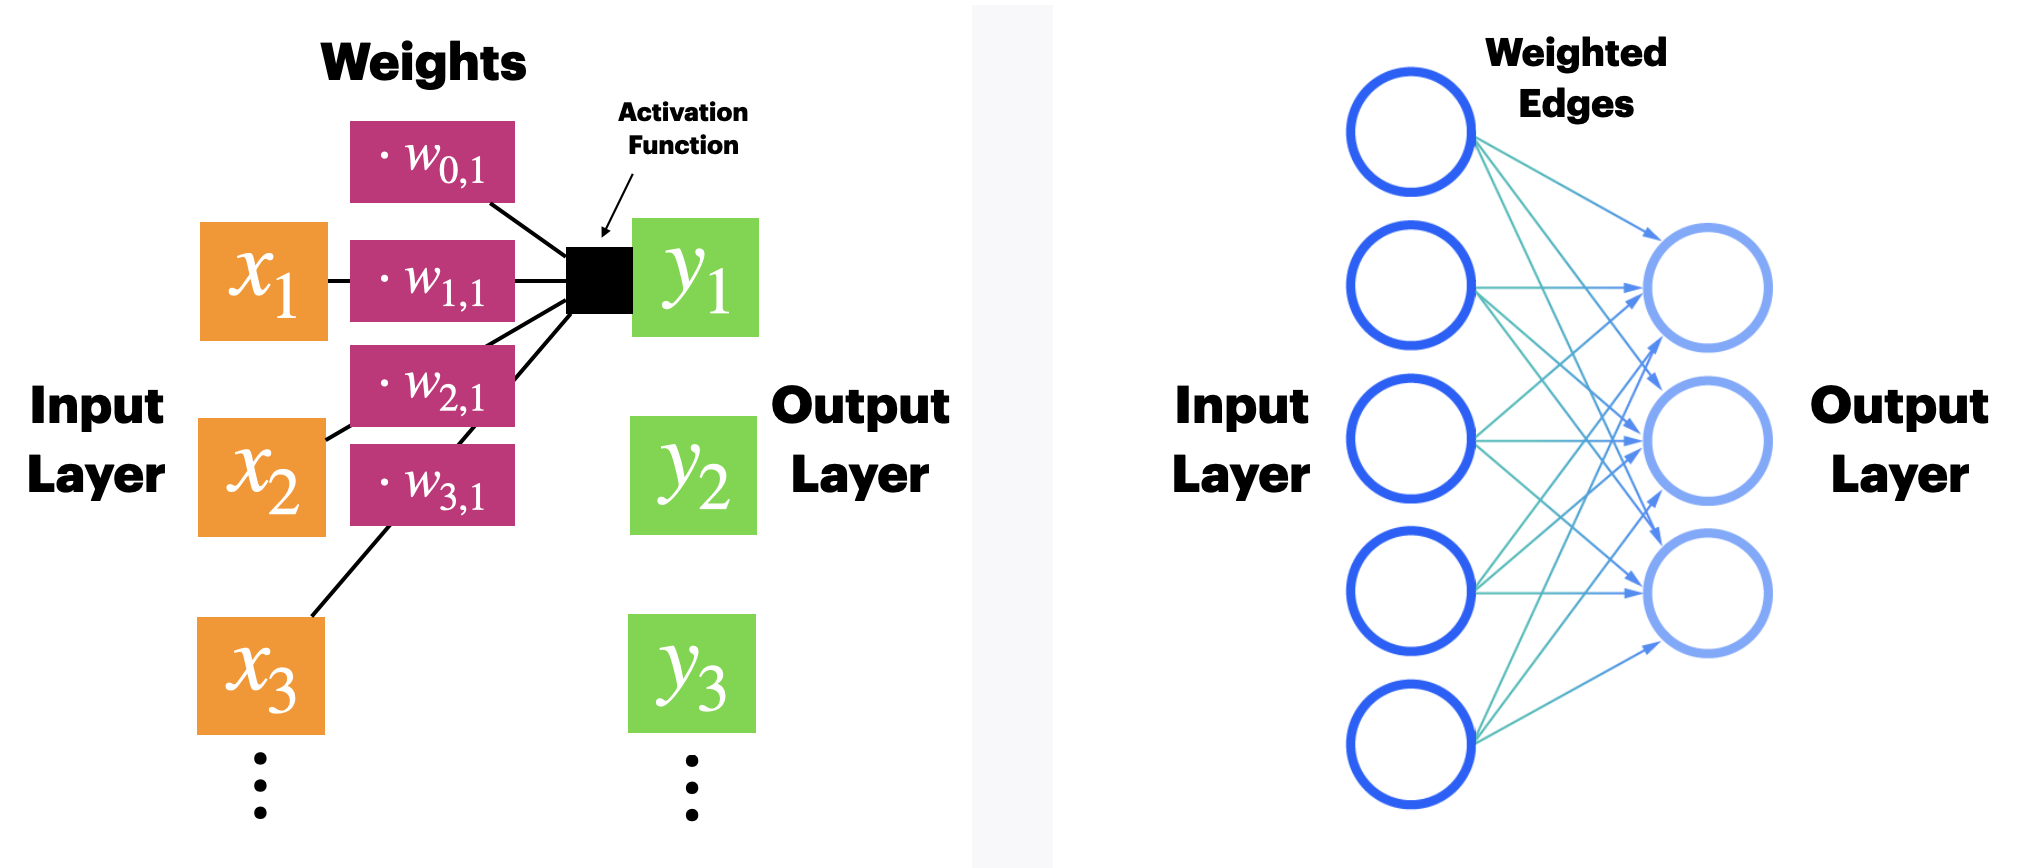

As we have discussed in class, a single layer of a perceptron takes in a set number input elements and generates a set number of output elements. In the simple dense setting, each output element depends on the weighted sum of all of the input elements. These weighted sums are then sent through an activation function which constrains the weighted sum to a desirable range/property space. 

Mathematically speaking, the perceptron model's generates the $d$'s entry of its predictions as follows: 

$$\hat y^{(d)} = a\big(\sum_{s} \theta_{s,d}x^{(s)}\big)$$

**DETALS:**
 - You can read $\theta_{s,d}$ as the weight along the path from input (or source) $x^{(s)}$ to output prediction (or destination) $\hat y^{(d)}$.
 - To incorporate a per-output-node bias, you can think about **weighing a static signal (or 1)**. You'll see why this is useful later.
 - The expression talks about $a$, which is an activation function. This is used to change the output to a space with some desirable property. We mentioned softmax earlier for enforcing a probability distribution constraint. There are a lot of other ones.
 - **HINT:** Yes, it's a triple for-loop. Sorry about that (-_-') 

This output value can be trained up to minimize a loss function directly. Alternatively, it can also be propageted to more layers further down in the architecture. **In our case, we're just going to use the simplest case where we only have one layer (linear function) and no activation function.**

### **[CHECK-OFF] Implement Perceptron Forward Pass**

Below, go ahead and implement the call function of a basic perceptron. This function is knows as the forward pass, or **forward propagation** as we propagate an initial input stream through a series of weightings and activations.

In [13]:
class BasicPerceptron:
    def __init__(self, input_shape, output_shape):
        self.ns = input_shape [-1]  ## number of source nodes  # [-1] means last item of the list 
        self.nd = output_shape[-1]  ## number of destination nodes
        np.random.seed(seed)
        self.w = np.random.normal(size=(self.ns, self.nd))  ## 'Weights' 
        self.b = np.random.normal(size=(self.nd))           ## Biases

    def __call__(self, X):
        '''TODO: Implement the call function. 
         - Should propagate X through the model
         - Use a triple for loop iterating over s, d, and i (in some order)
         - Use terminology "source node", "destination node", and 'row index'
         - You can index numpy matrix with commas, i.e. X[0,0]
        '''
        nx = X.shape[0]             ## number of rows
        out = np.zeros(shape=[nx, self.nd]) ## <- keep this line 
        ########################################################################
        for i in range(len(X)):  # you can't use range(X) since X consists of ([x0, x1],...) # X.shape: (100,2)
          for d in range(self.nd): # loop through output # Y0.shape: (60,1) # d takes value 0
            for s in range(self.ns): # loop through input # X0.shape: (60,2) # s takes value 0, 1
              out[i] += X[i, s] * self.w[s, d]
            out[i] += self.b[d]
        ########################################################################
        return out
    
    def optimize(self, X, Y, H):
        pass

print("Training on Training Subset")
model = ModelWrapper_v2(BasicPerceptron(X0.shape, Y0.shape))
model.compile(loss='MSE')
model.train(X0, Y0)
print(' - Evaluate on Training Set :', np.round(model.evaluate(X0, Y0, loss='MSE'), 3))
print(' - Evaluate on Testing Set  :', np.round(model.evaluate(X1, Y1, loss='MSE'), 3))

Training on Training Subset
 - Evaluate on Training Set : 39209.678
 - Evaluate on Testing Set  : 34701.682


In [14]:
out = np.zeros((3,1))
for i in range(0, 2):
  for x in range(0,2):
    out[i] += X[x, 0] * X[0, i]  # out[0] = X[0,0] * X[0,0] + X[1,0] * X[0,0]
out
a = np.random.normal(size=(2,1))
print(a)
a[1,0]

[[ 1.52302986]
 [-0.23415337]]


-0.23415337472333597

In [15]:
a = np.random.normal(size=(2))
print(a)
a[0]

[-0.23413696  1.57921282]


-0.23413695694918055

**[CHECK-OFF] EXPECTED:**
```
 - Evaluate on Training Set : 39209.678
 - Evaluate on Testing Set  : 34701.682
```

### Optimizing Via Gradient Descent

Recall that we have defined a forward pass for our model. Our model doesn't have any activation functions $a$ at the moment (you'll deal with that later).  With that in mind, the model takes in the input and produces output for a given parameter calibration as follows:

$$\hat y^{(d)} = \sum_{s} \theta_{s,d}x^{(s)}$$

<details><summary>What does this look like for our problem</summary>
Since we actually only have 2 input nodes, 1 (biased) output node, and no activation, our specific example uses: 

$$\hat y(x) = \theta_{0,0}x^{(0)} + \theta_{1,0}x^{(1)} + \theta_{2,0}$$
</details>

We specified that in order to show how close the model predictions are to training set ground truth, we were going to default to the $L^2$ norm (or euclidean norm). Recall that the $L^2$ distance between two vectors $\vec A$ and $\vec B$ is: 

$$||\vec A - \vec B||_{2} = \sqrt{\sum_d (\vec A_d - \vec B_d)^2}$$

For the sake of loss computation (since we just want something proportional to this and also because square roots are expensive to estimate), we will eliminate the square root and replace it with a mean to get something called **Mean Squared Error**. We can then incorporate this distance metric into a loss function: 

$$\mathcal{L}_{MSE}(y, \hat y) = \frac{1}{|\hat y|}\sum_d(\hat y^{(d)}- y^{(d)})^2$$


The supervised machine learning objective we've been discussing involves minimizing the loss evaluation for the data we are training on. We haven't coded up a routine for that yet though. Our weights $\theta$ are not being updated, but how are we supposed to know which way to update them. 

Obviously, we want to shift our weights towards a good configuration. One pretty instinctive approach is to shift them in a way that makes the loss decrease. This is the idea behind gradient descent. 

- **Gradient:** Generalization of slope into higher dimensions. It's the rate of change when going in a speciifc direction.
- **Descent:** To go down. In this case, this is referring to the gradient of the loss function. 

The idea here is that we can change the weights in such a way that we incrementally minimize the loss evaluation. How can we do that? **With some calculus**!

The gradient of $\mathcal{L}_{MSE}$ as a function of (or "with respect to") a single tunable parameters $\theta_{s,d}$ is proportional to: 

$$\frac{\partial \mathcal{L}_{MSE}}{\partial{\theta_{s,d}}} 
= \frac{\partial}{\partial{\theta_{s,d}}}(\hat y^{(d)} - y^{(d)})^2$$

<details><summary>What happened to the sum?</summary>
To make the computations even easier, we went ahead and jumped to the logical conclusion that the weight from $\theta_{s,d}$ only contributes to the loss via $\hat y^{(d)}$ for any one given $d$. This should be pretty easy to intuit and is very easy to prove (the derivative of the summation is 0 for all but one term); however, assuming it allows us to entirely remove summations from the exercise.
</details>

<details><summary>What happened to the mean scaling?</summary>
We're just discarding it for now. It's not gonna be important for us since the optimization just cares about the relative relationship.
</details>

For simplicity, we will use the following shorthands through this section of math. 
 - Let $y = y^{(d)}$ 
 - Let $\hat y = \hat y^{(d)} = h_{\theta}(x)^{(d)}$.

Though this could be solved directly, recall that per the chain rule: 

$$\frac{\partial \mathcal{L}}{\partial{\theta}_{s,d}} 
= \frac{\partial \mathcal{L}}{\partial \hat y}\frac{\partial \hat y}{\partial \theta_{s,d}}$$

This is much easier and will be useful for scaling up the network later on. 

Let's go ahead and compute the impact of the model prediction on the loss: 

\begin{align}
\frac{\partial \mathcal{L}}{\partial \hat y} \ 
=\ & \frac{\partial}{\partial \hat y}\big(\hat y - y\big)^2 \\ 
=\ &  \frac{\partial}{\partial \hat y}\big(\hat y^2 - 2y \hat y + y^2\big) \\ 
=\ &  2\big(\hat y - y\big) \\ \overset{\propto}{=}\ & 
\hat y - y
\end{align}

<details>
$\propto$ means "proportional to". We won't be caring much about the 2 constant. Other versions might add a mysterious $1/2$ constant to balance this out. Just know that it doesn't matter. 
</details>


Similarly, let's compute the impact of the parameter on the model prediction (*recall this from the math review*): 

\begin{align}
\frac{\partial \hat y}{\partial \theta_{s,d}} \ =\ & 
\frac{\partial}{\partial \theta_{s,d}} \big(\theta_{s,d}x^{(s)} + \sum_{s' \neq s} \theta_{s',d}x^{(s')}\big) \ =\ 
\frac{\partial}{\partial \theta_{s,d}} \theta_{s,d}x^{(s)} \ =\ x^{(s)}
\end{align}

And there we go! We now know that for a non-activated single-layer perceptron, the gradient of loss $\mathcal{L}_{MSE}$ with respect to a particular parameter $\theta_{s, d}$ can be seen as: 

$$\frac{\partial \mathcal{L}_{MSE}}{\partial{\theta}_{s,d}} 
= \frac{\partial \mathcal{L}_{MSE}}{\partial \hat y^{(d)}}\frac{\partial \hat y^{(d)}}{\partial \theta_{s,d}}
= (\hat y^{(d)} - y^{(d)})x^{(s)}
$$

#### So... what does this tell us? 
> The gradient of the loss as a function of input, output, and prediction!

#### Why is this useful?
- If the gradient is **positive** ($\mathcal{L}$ and $\theta_{s,d}$ are **positively correlated** at current configuration), ***decreasing $\theta_{s,d}$ decreases $\mathcal{L}$***.
- If the gradient is **negative** ($\mathcal{L}$ and $\theta_{s,d}$ are **negatively correlated** at current configuration), ***increasing $\theta_{s,d}$ decreases $\mathcal{L}$***.

...

So... **why not just shift $\theta_{s,d}$ by the negative gradient?** When the parameter setting has a lot of impact on the loss w/ current param configurations, its gradient will have a large magnitude and so it will be shifted significantly and vice versa. This seems like a good plan (and is the simplest version of gradient descent).

### **[CHECK-OFF] Implement Gradient Descent**

Below, go ahead and extent the basic perceptron to incorporate gradient descent-based back-propagation. 

**Some things to keep in mind:**

- Since you're updating the weights per row for a large number of data rows, you will want to divide the gradient by the number of entries so that you consider the **average gradient** per output element. 
- You should incorporate a **learning rate**
  - This linearly scales the impact of the gradient on the weights, and is one of the efforts used to try to "jump around" the loss function space towards a global minimum in a non-convex loss environment. 
  - The below stencil code already pulls in the learning rate; you just have to use it. 
- Please implement this via looping. 
  - There is a fast vectorized approach which you will have to implement in your first programming assignment (because otherwise it'll be too slow in Python), but this is your chance to actually try the iterative approach and see if it works.
- Don't forget to incorporate the bias!
  - Remember how you could think of the bias as a weight being applied to a constant signal. 
  - **Also, make sure to only allow the bias to contribute once per output node.**
- **HINT:** Yes, it's a triple for-loop again. You should already be expecting it, so I'm not sorry anymore (•̀.̫•́)

In [16]:
class BasicPerceptron_v2(BasicPerceptron):
    
    # def __call__(self, X):        ## Should be implemented in v1

    # def __init__(self, input_shape, output_shape):         ## FOR REMINDERS
    #     self.ns = input_shape [-1]  ## number of source nodes
    #     self.nd = output_shape[-1]  ## number of destination nodes
    #     np.random.seed(seed)
    #     self.w = np.random.normal(size=(self.ns, self.nd))  ## 'Weights'
    #     self.b = np.random.normal(size=(self.nd))           ## Biases

    def __init__(self, input_shape, output_shape, learning_rate=1):
        super().__init__(input_shape, output_shape)
        self.lr = learning_rate     ## Now takes in learning rate
    
    def optimize(self, X, Y, H): # H is prediction
        '''
        TODO: Implement This Using For Loops
        Don't forget about updating the bias (hint; bias = weight with input=1)
        and incorporate a learning rate as supplied by the user. 
        This function does its modification in-place and returns nothing.
        '''
        nx = X.shape[0]
        ########################################################################
        for i in range(len(X)):   # X.shape: (100,2)
          for d in range(self.nd): # loop through output # Y0.shape: (60,1) # d takes value 0
            for s in range(self.ns): # loop through input # X0.shape: (60,2) # s takes value 0, 1
               grad = ((H[i, d] - Y[i, d]) * X[i, s]) / nx
               self.w[s, d] -= self.lr * grad
            self.b[d] -= self.lr * (H[i, d] - Y[i, d]) / nx
        ########################################################################


print("Training on Training Subset")
model = ModelWrapper_v2(
    BasicPerceptron_v2(X0.shape, Y0.shape, learning_rate=0.0001)
)
model.compile(loss='MSE')

print(f'''
 > Before One Training Step: 
   - Weights : {np.round(model.model.w, 2).tolist()}
   - Biases  : {np.round(model.model.b, 2).tolist()}''')
model.train(X0, Y0)
print(f'''
 > After One Training Step:
   - Weights : {np.round(model.model.w, 2).tolist()}
   - Biases  : {np.round(model.model.b, 2).tolist()}''')

Training on Training Subset

 > Before One Training Step: 
   - Weights : [[0.5], [-0.14]]
   - Biases  : [0.65]

 > After One Training Step:
   - Weights : [[5.88], [5.55]]
   - Biases  : [0.67]


In [17]:
print(X[0,0])
print(X[0,1])
X[0]

102
445


array([102, 445])

**[CHECK-OFF] EXPECTED:**
```
 - Weights : [[0.5], [-0.14]]
 - Biases  : [0.65]
--------------------------------
 - Weights : [[5.88], [5.55]]
 - Biases  : [0.67]
 ```

**Huh, I wonder why the bias didn't move much?** It has to do with dataset normalization: Since the values of $X$ are so large (potentially in the hundreds), it is able to scale the weight gradients (which is a factor of $X$) much faster than the bias gradient (which is a factor of 1). Compounded with the low learning rate we need in order to keep the weighing parameters from going out of control, this essentially means that the bias is practically bricked.

### Awesome! Congrats! You did it! 

Your model trains for one epoch and updates the weights accordingly. Great Job!

Now then, it is missing a few additional features. The most important feature is the ability to train for multiple iterations, or **epochs**. However, since this lab is already long enough (and because you'll have to make your own version for assignment 1 anyways :D), we'll let you see how this can be implemented within our model wrapper framework. 

Specifically, the following code implements: 
 - **Normalization**: We noticed that the bias has pretty little impact relative to the weights. We can fix that. We'll just scale it down for simplicity, though.
 - **Epochs**: Allows the network to train for multiple optimization runs. 
 - **Validation**: As you're training and evaluating your model on the training set, go ahead and run the model on the validation set just to see how well it's generalizing as the training progresses. 
 - **Batching**: Sometimes, you want to divide up the dataset to where your model updates the gradients multiple times per epoch. Furthermore, you may have a memory bottleneck or general slowdown when you load the training dataset through memory. This allows you to feed in subsets of your training dataset, and will be expected from you in your assignment. 

In [18]:
class ModelWrapper_v3(ModelWrapper_v2):

    # def __init__(self, model):         ## Already Implemented in v1
    # def _get_loss_fn(self, loss_key):  ## Already Implemented in v1
    # def evaluate(self, x, y):          ## Already Implemented in v1
    # def compile(self, loss='MSE'):     ## Already Implemented in v2
    # def predict(self, x):              ## Already Implemented in v2
    
    def train(self, x, y, epochs=1, validation=None, batch_size=None):
        
        losses_t = [0] * epochs   ## Training loss history
        losses_v = [0] * epochs   ## Validation loss history

        xn = x.shape[0]
        has_val = validation is not None  # has_val returns value True or False 
        if batch_size is None: batch_size = xn  ## By default, put all in one batch
        batch_size = min(batch_size, xn)        ## Make sure batch size is valid
        
        for epoch in range(epochs): 

            for b_end in range(batch_size, xn+1, batch_size):
                ## Sample batching implementation
                ## Updates gradients in smaller batches. Lowers memory usage
                xt = x[b_end - batch_size : b_end] # [0 : batch_size]
                yt = y[b_end - batch_size : b_end] # [0 : batch_size]
                ht = self.model(xt)                     ## Predict
                losses_e = self.loss_fn(ht, yt)         ## Evaluate losses
                losses_t[epoch] = [np.mean(losses_e)]   ## Save training loss history
                self.model.optimize(xt, yt, ht)         ## Optimize model
            
            if has_val: 
                ## Incorporating validation into the epoch loop
                xv, yv = validation
                hv = self.model(xv)
                losses_e = self.loss_fn(hv, yv)
                losses_v[epoch] = [np.mean(losses_e)]
        
        if has_val: return np.concatenate([losses_t, losses_v], axis=-1)
        else:       return np.array(losses_t)

############################################################
## DATA PROCESSING

## Generate 1000 entries of X between 0 and 500 
X = np.concatenate([
    np.random.choice(500, 1000).reshape([-1, 1]),
    np.random.choice(500, 1000).reshape([-1, 1])
], axis=1).astype(np.float32)

## Generate realizations Y from F and add noise
Y = true_f(X, coef, bias).astype(np.float32)
Y += noise_f(Y.shape)

############################################################ !!!!!!!!!!!!!!!!!!
## Normalize the inputs in some way (this is just scaling them; naive)
normalize = True                               ## <-- !!! MODIFY THIS FOR Q2 !!!
if normalize: 
    ## We're scaling both by same amount just to preserve relationship.
    ## You should really be treating each column separately in practice
    max_v = 500                                ## Rough guess, but helps with Q2.
    # max_v = max(X.max(), Y.max())
    X, Y = X/max_v, Y/max_v
    learning_rate = 0.5
else: 
    learning_rate = 0.00001

############################################################

## Split them up into two datasets
split_idx = 700
X0, X1 = X[:split_idx], X[split_idx:]
Y0, Y1 = Y[:split_idx], Y[split_idx:]

############################################################
## MODEL TRAINING

'''Trains a default model on the Xs and Ys dataset'''
model = ModelWrapper_v3(
    BasicPerceptron_v2(X0.shape, Y0.shape, learning_rate=learning_rate)
)
model.compile(loss='MSE')

hist = model.train(
    X0, Y0,
    epochs=20, 
    validation=(X1, Y1), 
    batch_size=50
)

## hist[::2]: from beginning, to end, in increments of 2
print(f'''Losses: Train | Test \t ## Note: Lower doesn\'t guarantee better if data domains differ
{np.round(hist[::2], 4)}

Model Parameters: 
 - Weights : {np.round(model.model.w, 5).tolist()}
 - Biases  : {np.round(model.model.b, 5).tolist()} \t ## This seems different. Wonder why :)

True Distribution Parameters: 
 - Weights : {coef}
 - Biases  : {bias}
 ''')

Losses: Train | Test 	 ## Note: Lower doesn't guarantee better if data domains differ
[[0.0119 0.0135]
 [0.0023 0.0026]
 [0.0005 0.0005]
 [0.0001 0.0001]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]]

Model Parameters: 
 - Weights : [[0.79985], [0.20029]]
 - Biases  : [0.04003] 	 ## This seems different. Wonder why :)

True Distribution Parameters: 
 - Weights : [0.8 0.2]
 - Biases  : [20]
 


In [19]:
X[0:3,:]

array([[0.204, 0.564],
       [0.242, 0.352],
       [0.932, 0.92 ]], dtype=float32)

In [20]:
X[[0,1,2],:]

array([[0.204, 0.564],
       [0.242, 0.352],
       [0.932, 0.92 ]], dtype=float32)

In [21]:
b = np.array([[1, 2, 3],[4,5,6]])
print(b)
b.reshape([-1,1]).shape

[[1 2 3]
 [4 5 6]]


(6, 1)

In [22]:
b.reshape([1,-1]).shape

(1, 6)

In [23]:
c = (X1, Y1)
c[0][0][0]

0.086

**[CHECK-OFF]**
 - Let's say that we instead wanted to model $f(x) = x^2$ with the same model architecture. How would it perform, and why?

 - Notice that we get two different biases depending on whether we normalize our datasets... but neither of the biases are 20. Why? 

 - Using the chain rule, we were able to compute $\frac{\partial\mathcal{L}}{\partial\theta}$ as a product of $\frac{\partial\mathcal{L}}{\partial\hat y}$ and $\frac{\partial\hat y}{\partial\theta}$. Let's say we now wanted to build a basic single-layer perceptron that *tries to* predicts whether a picture is of a cat or a dog. How would this effect our loss computation? **You don't have to solve it. We just want you to talk about what new terms might be necessary.** <details><summary><b>Hints</b></summary>
   - **[Hint 1]** Remember that there is an activation function that binds an element to [0,1].
   - **[Hint 2]** Remember that there is a loss function that works well with probabilities. 
</details>

##Getting checked off##
Once you're satisfied with how everything's running, call over a TA to get checked off and you're all set. 

Let us know if you have any other questions!

---